In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, header=None, names=columns)

# Display first few rows
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
# Check for missing values
print(iris_df.isnull().sum())
# Handling missing values if any (e.g., filling with mean)
iris_df.fillna(iris_df.mean(), inplace=True)
# Standardizing the numerical features
scaler = StandardScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df[features] = scaler.fit_transform(iris_df[features])
print(iris_df.head())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width      species
0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa
3     -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa
4     -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa


C:\Users\USER\AppData\Local\Temp\ipykernel_1932\3267845526.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.fillna(iris_df.mean(), inplace=True)


                sepal_length                     sepal_width            \
                        mean    median       var        mean    median   
species                                                                  
Iris-setosa        -1.014579 -1.021849  0.182418    0.842307  0.800654   
Iris-versicolor     0.112282  0.068662  0.391167   -0.657184 -0.587764   
Iris-virginica      0.902297  0.795669  0.593642   -0.185122 -0.124958   

                          petal_length                     petal_width  \
                      var         mean    median       var        mean   
species                                                                  
Iris-setosa      0.777398    -1.304878 -1.284407  0.009735   -1.255129   
Iris-versicolor  0.527277     0.285087  0.336266  0.071406    0.167409   
Iris-virginica   0.556914     1.019792  1.018654  0.098495    1.087720   

                                     
                   median       var  
species                           

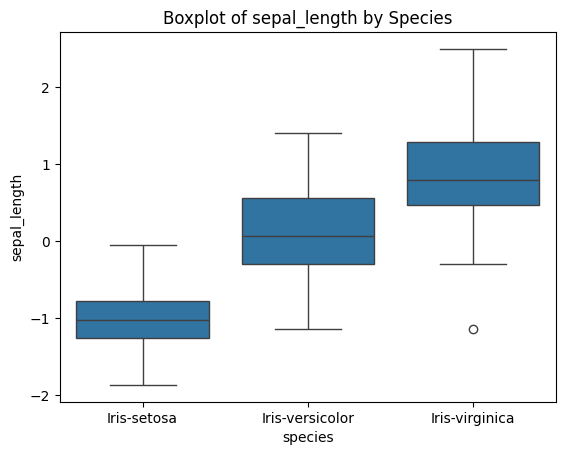

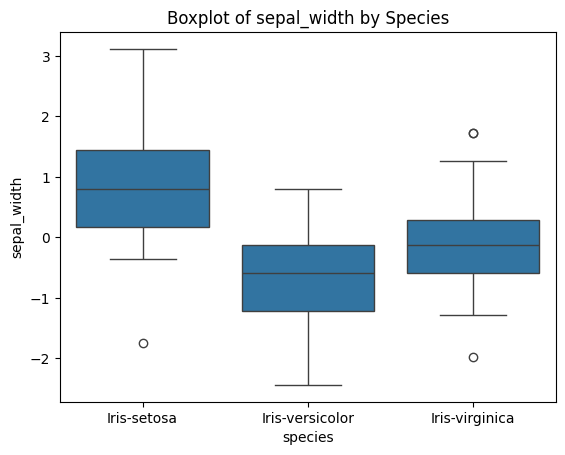

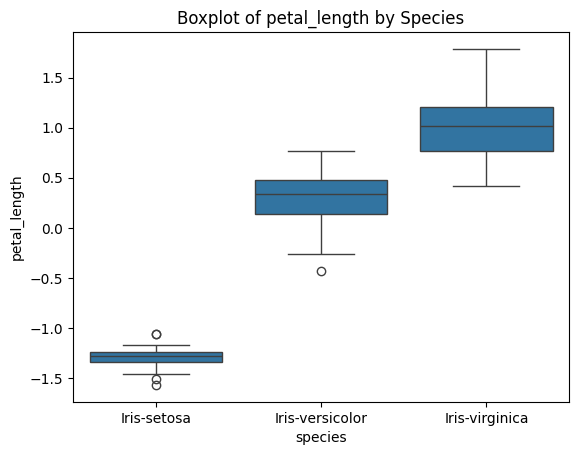

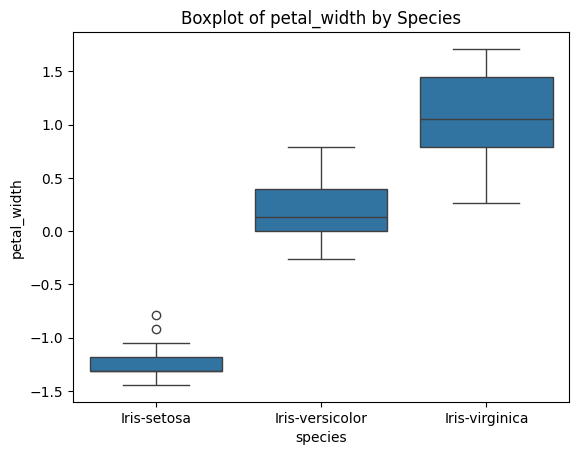

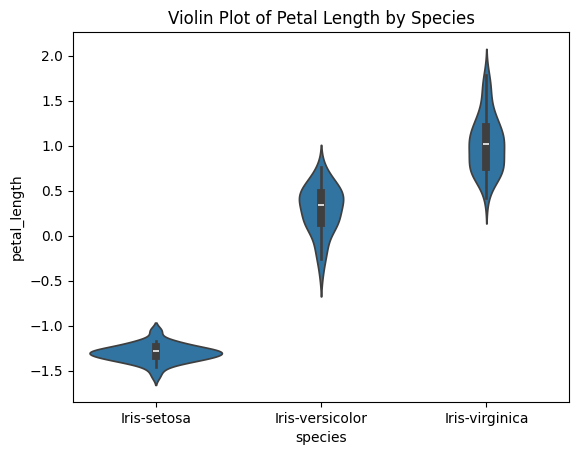

In [3]:
# Summary statistics grouped by species
summary_stats = iris_df.groupby('species').agg(['mean', 'median', 'var'])
print(summary_stats)
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each feature
for feature in features:
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'Boxplot of {feature} by Species')
    plt.show()
sns.violinplot(x='species', y='petal_length', data=iris_df)
plt.title('Violin Plot of Petal Length by Species')
plt.show()


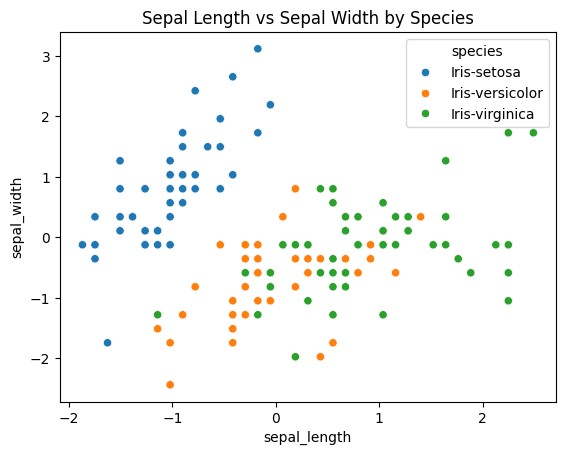

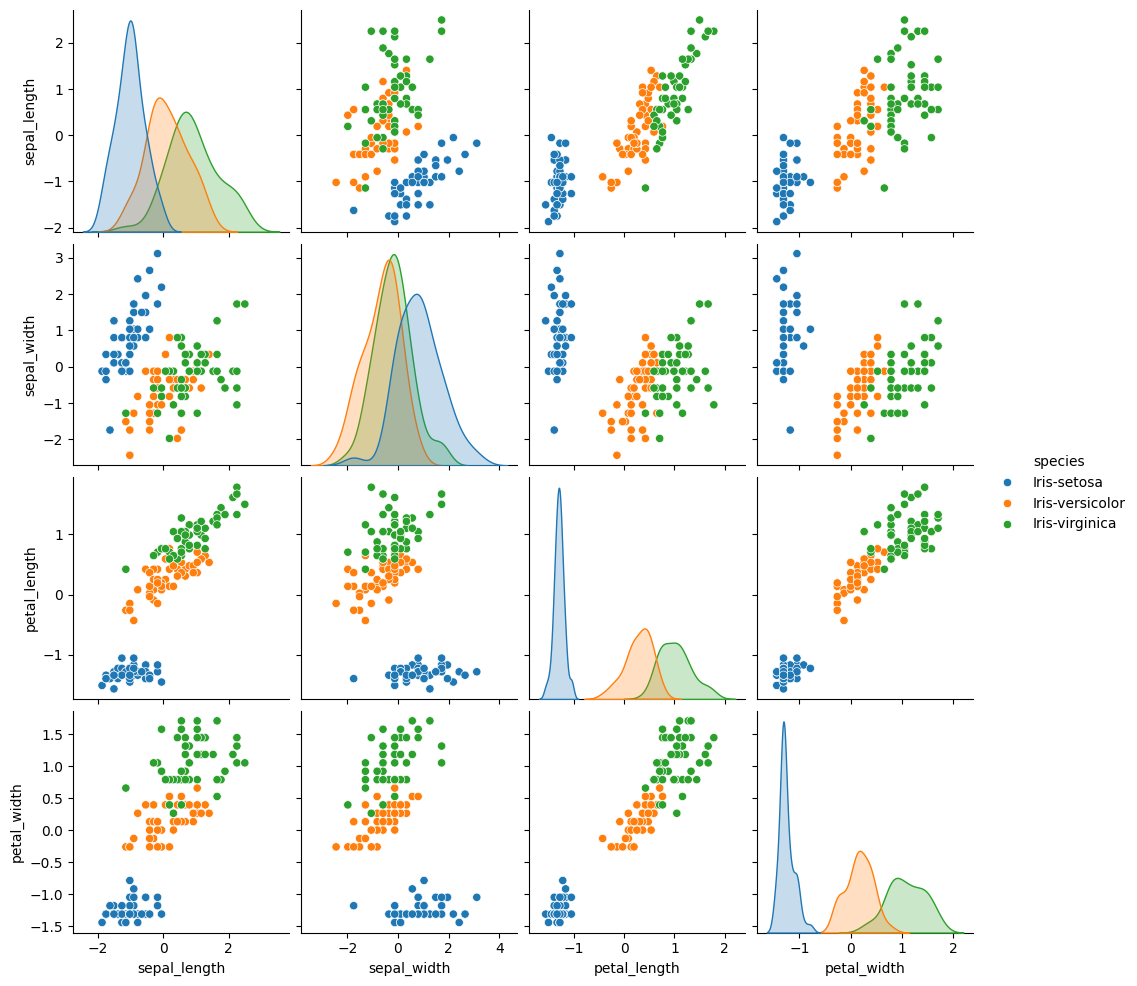

In [4]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df)
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()
sns.pairplot(iris_df, hue='species')
plt.show()


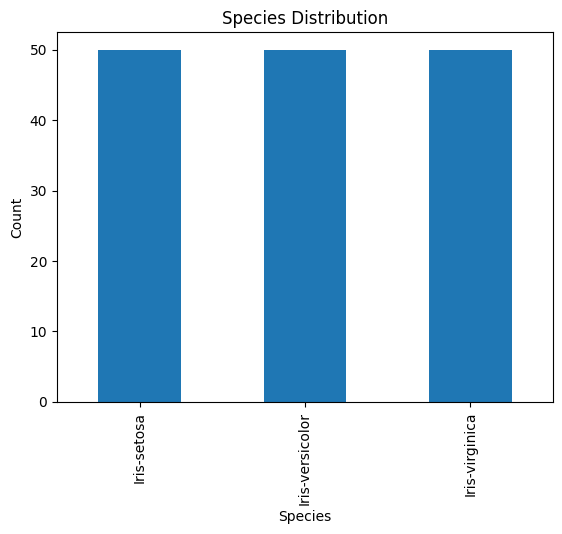

Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: species, dtype: float64


In [5]:
species_count = iris_df['species'].value_counts()
species_count.plot(kind='bar')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()
species_percentage = iris_df['species'].value_counts(normalize=True) * 100
print(species_percentage)


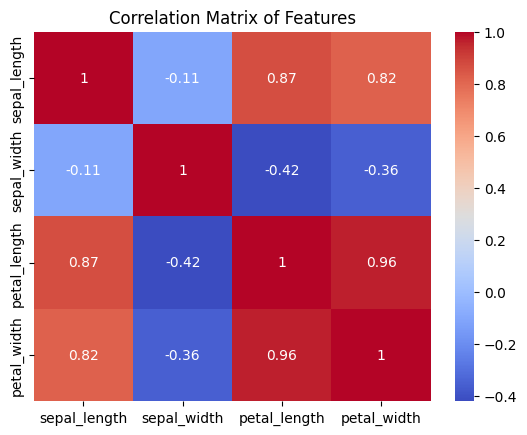

In [6]:
# Correlation matrix
correlation_matrix = iris_df[features].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


   sepal_ratio  petal_ratio
0    -0.872705     1.021551
1     9.147238     1.021551
2    -4.100517     1.064861
3   -14.152993     0.978240
4    -0.808770     1.021551
                 sepal_ratio  petal_ratio
species                                  
Iris-setosa        -0.644306     1.051836
Iris-versicolor     0.516253    16.728907
Iris-virginica     -1.123662     1.056293


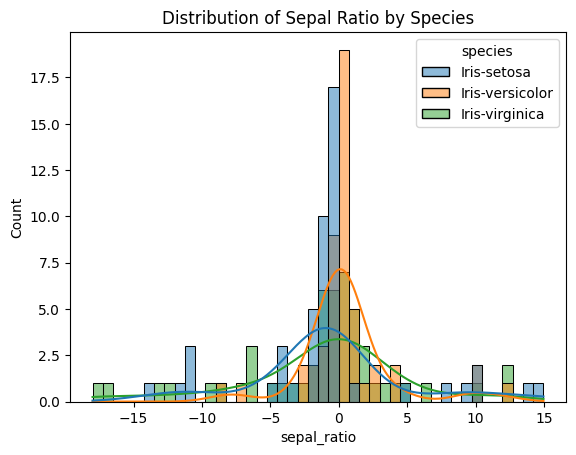

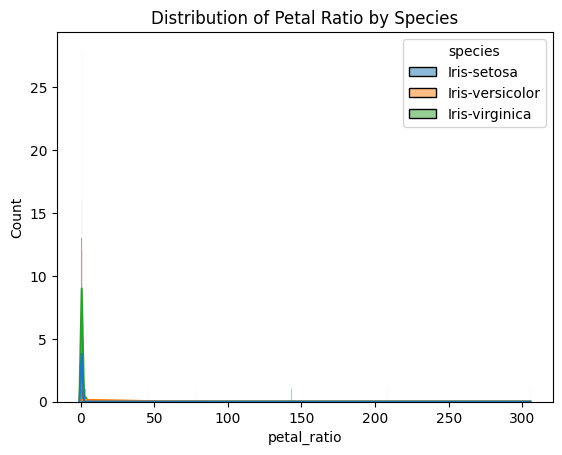

In [7]:
# Creating new features
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']
print(iris_df[['sepal_ratio', 'petal_ratio']].head())
# Analyzing species with largest sepal_ratio and petal_ratio
avg_ratios = iris_df.groupby('species')[['sepal_ratio', 'petal_ratio']].mean()
print(avg_ratios)
# Visualizing the distributions with histograms
sns.histplot(data=iris_df, x='sepal_ratio', hue='species', kde=True)
plt.title('Distribution of Sepal Ratio by Species')
plt.show()

sns.histplot(data=iris_df, x='petal_ratio', hue='species', kde=True)
plt.title('Distribution of Petal Ratio by Species')
plt.show()


       PCA1      PCA2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


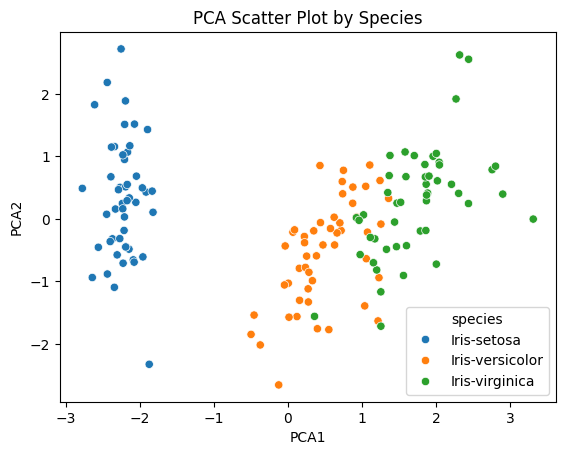

In [8]:
from sklearn.decomposition import PCA

# PCA on the standardized features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(iris_df[features])
iris_df['PCA1'] = pca_components[:, 0]
iris_df['PCA2'] = pca_components[:, 1]
print(iris_df[['PCA1', 'PCA2']].head())
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=iris_df)
plt.title('PCA Scatter Plot by Species')
plt.show()


0    96
1    32
2    22
Name: cluster, dtype: int64
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]
Clustering accuracy: 0.0


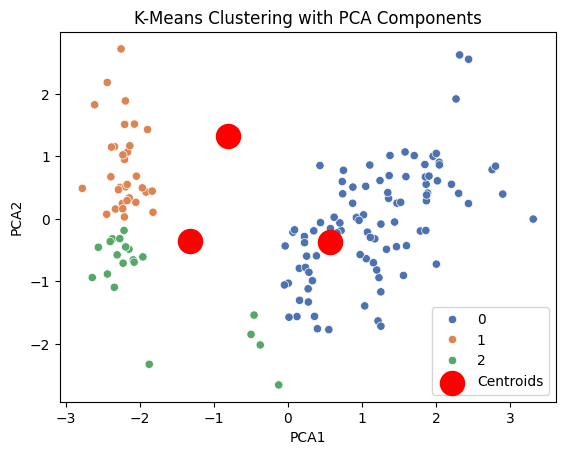

In [9]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_df[features])
print(iris_df['cluster'].value_counts())
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix and accuracy
true_labels = iris_df['species'].astype('category').cat.codes
conf_matrix = confusion_matrix(true_labels, iris_df['cluster'])
print(conf_matrix)
accuracy = accuracy_score(true_labels, iris_df['cluster'])
print(f'Clustering accuracy: {accuracy}')
# Plotting clusters and centroids
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=iris_df, palette='deep')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.legend()
plt.title('K-Means Clustering with PCA Components')
plt.show()


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



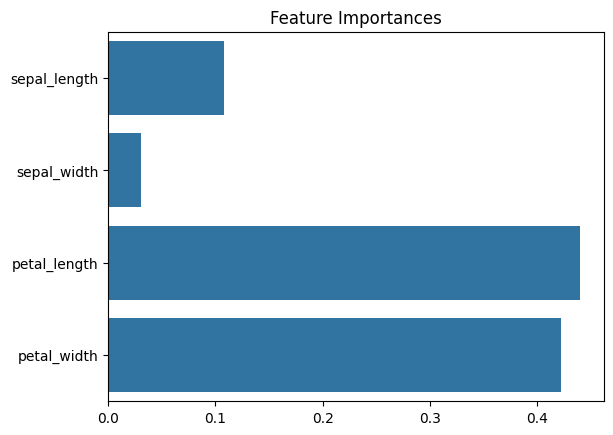

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = iris_df[features]
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
from sklearn.metrics import classification_report

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
# Plot feature importance
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()
